In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
dados=pd.read_csv('IBGE_alura.csv')
dados[:3]

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444


# Analises descritivas preliminares

In [ ]:
dados.describe()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
count,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000
mean,31.912962,0.307002,44.071421,5.032613,9.469664,2000.383199,1.699512
std,11.147830,0.461253,12.480583,2.857118,4.539929,3323.387730,0.079717
min,11.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.339245
25%,25.000000,0.000000,34.000000,2.000000,6.000000,788.000000,1.645785
50%,31.000000,0.000000,43.000000,4.000000,11.000000,1200.000000,1.699325
75%,41.000000,1.000000,53.000000,8.000000,12.000000,2000.000000,1.753062
max,53.000000,1.000000,99.000000,8.000000,17.000000,200000.000000,2.028497


In [ ]:
dados.corr() #olharemos para Renda como variável dependente

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
UF,1.000000,0.001479,0.019818,-0.252820,0.123380,0.127939,-0.000552
Sexo,0.001479,1.000000,0.002994,-0.003193,0.115662,-0.086826,0.001315
Idade,0.019818,0.002994,1.000000,-0.058952,-0.267614,0.041357,-0.001470
Cor,-0.252820,-0.003193,-0.058952,1.000000,-0.173609,-0.151921,-0.002849
Anos de Estudo,0.123380,0.115662,-0.267614,-0.173609,1.000000,0.332152,0.003817
Renda,0.127939,-0.086826,0.041357,-0.151921,0.332152,1.000000,-0.004073
Altura,-0.000552,0.001315,-0.001470,-0.002849,0.003817,-0.004073,1.000000


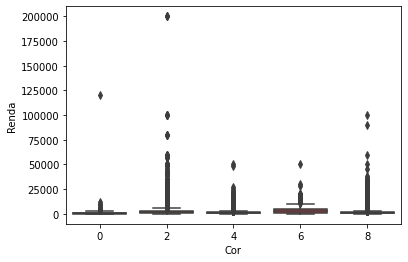

In [ ]:
sns.boxplot(x='Cor',y='Renda', data = dados)

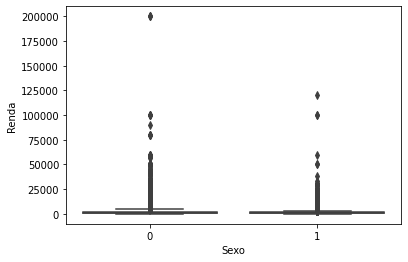

In [ ]:
sns.boxplot(x='Sexo',y='Renda', data = dados)

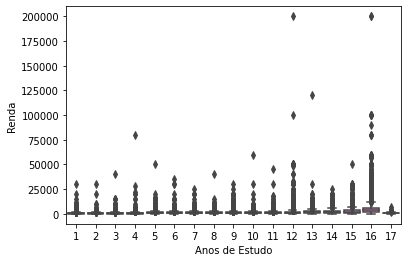

In [ ]:
sns.boxplot(x='Anos de Estudo',y='Renda', data = dados)

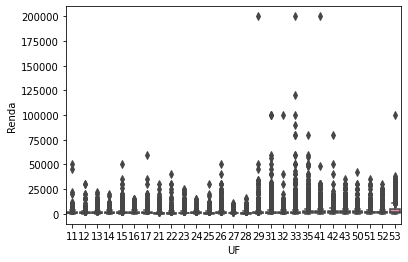

In [ ]:
sns.boxplot(x='UF',y='Renda', data = dados)

# Covariância

In [ ]:
dados.cov()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Renda_prevista
UF,124.274104,0.007603,2.757254,-8.052472,6.244318,4.739937e+03,-0.000491,1.518285e+03
Sexo,0.007603,0.212754,0.017233,-0.004208,0.242203,-1.330979e+02,0.000048,5.889079e+01
Idade,2.757254,0.017233,155.764964,-2.102122,-15.163270,1.715405e+03,-0.001463,-3.686898e+03
Cor,-8.052472,-0.004208,-2.102122,8.163124,-2.251903,-1.442538e+03,-0.000649,-5.475426e+02
Anos de Estudo,6.244318,0.242203,-15.163270,-2.251903,20.610957,5.011485e+03,0.001382,5.011485e+03
Renda,4739.937478,-133.097902,1715.405107,-1442.537687,5011.484594,1.104491e+07,-1.078964,1.218526e+06
Altura,-0.000491,0.000048,-0.001463,-0.000649,0.001382,-1.078964e+00,0.006355,3.359138e-01
Renda_prevista,1518.284756,58.890793,-3686.898027,-547.542636,5011.484594,1.218526e+06,0.335914,1.218526e+06


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


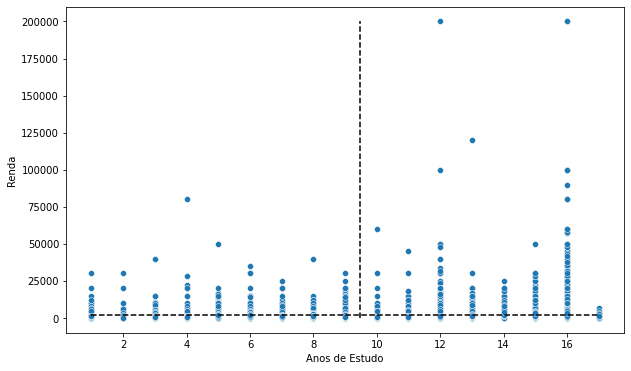

In [ ]:
x = dados['Anos de Estudo']
y = dados['Renda']

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed') 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


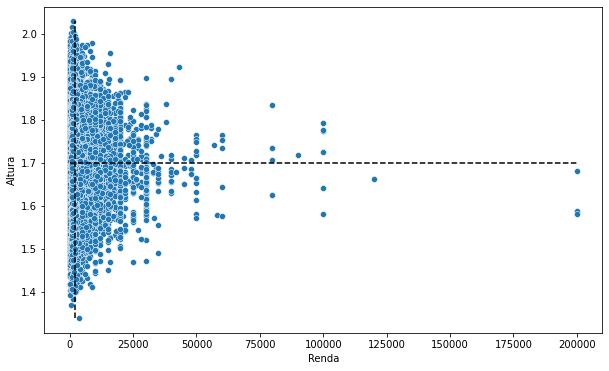

In [ ]:
x = dados['Renda']
y = dados['Altura']

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed') 

# Regressão Linear Simples

Vamos considerar a variável dependente Renda e as variáveis explicativas Cor, UF, Anos de Estudo e Sexo

In [ ]:
y=dados['Renda']

In [ ]:
import statsmodels.api as sm
x=sm.add_constant(dados['Anos de Estudo'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
resultado_regressao = sm.OLS(y, x).fit()

In [ ]:
resultado_regressao.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Renda   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     9528.
Date:                Thu, 09 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:26:49   Log-Likelihood:            -7.2762e+05
No. Observations:               76840   AIC:                         1.455e+06
Df Residuals:                   76838   BIC:                         1.455e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -302.1337     26.159    -11.550      0.000    -353.405    -250.863
Anos de Estudo   243.1466      2.491     97.613      0.000     238.264     248.029
==============================================================================
Omnibus:                   160253.093   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1868553383.992
Skew:                          17.476   Prob(JB):                         0.00
Kurtosis:                     766.150   Cond. No.                         24.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
dados['Renda_prevista']=resultado_regressao.predict()

In [ ]:
dados['Renda_prevista']

0        2615.625810
1        2615.625810
2        3345.065696
3        1156.746036
4        1886.185923
            ...     
76835    2372.479181
76836    1399.892665
76837    2615.625810
76838     670.452778
76839     670.452778
Name: Renda_prevista, Length: 76840, dtype: float64

# Regressão Linear

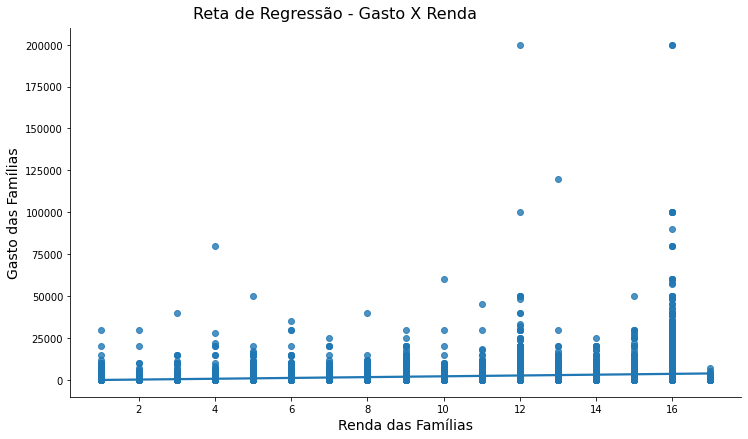

In [ ]:
ax = sns.lmplot(x="Anos de Estudo", y="Renda", data=dados)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Gasto X Renda', fontsize=16, y=1.02)
ax.set_xlabels("Renda das Famílias", fontsize=14)
ax.set_ylabels("Gasto das Famílias", fontsize=14)
ax

Método dos mínimos quadrados

In [ ]:
beta_1 = resultado_regressao.params[0]
beta_1

-302.1337373785022

In [ ]:
beta_2 = resultado_regressao.params[1]
beta_2

243.1466289105929

In [ ]:
resultado_regressao.conf_int(alpha=0.05)

,0,1
const,-353.404915,-250.862560
Anos de Estudo,238.264440,248.028818


Obtendo previsões

In [ ]:
dados['Y_previsto_statsmodels'] = resultado_regressao.predict()
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Renda_prevista,Residuos,Y_previsto_statsmodels
0,11,0,23,8,12,800,1.603808,2615.625810,-1815.625810,2615.625810
1,11,1,23,2,12,1150,1.739790,2615.625810,-1465.625810,2615.625810
2,11,1,35,8,15,880,1.760444,3345.065696,-2465.065696,3345.065696
3,11,0,46,2,6,3500,1.783158,1156.746036,2343.253964,1156.746036
4,11,1,47,8,9,150,1.690631,1886.185923,-1736.185923,1886.185923


In [ ]:
dados.drop(['Y_previsto_statsmodels'], axis = 1, inplace = True) # apagando só pra não ficar repetido
dados[:3]

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Renda_prevista,Residuos
0,11,0,23,8,12,800,1.603808,2615.625810,-1815.625810
1,11,1,23,2,12,1150,1.739790,2615.625810,-1465.625810
2,11,1,35,8,15,880,1.760444,3345.065696,-2465.065696


In [ ]:
resultado_regressao.predict([1, 20])[0] #uma pessoa que estuda 20 anos recebe 4500 ( :'())

4560.798840833357

# Resíduos

In [ ]:
dados['Residuos'] = resultado_regressao.resid
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Renda_prevista,Residuos
0,11,0,23,8,12,800,1.603808,2615.625810,-1815.625810
1,11,1,23,2,12,1150,1.739790,2615.625810,-1465.625810
2,11,1,35,8,15,880,1.760444,3345.065696,-2465.065696
3,11,0,46,2,6,3500,1.783158,1156.746036,2343.253964
4,11,1,47,8,9,150,1.690631,1886.185923,-1736.185923


In [ ]:
dados['Residuos'].mean()

1.0011567712282044e-10

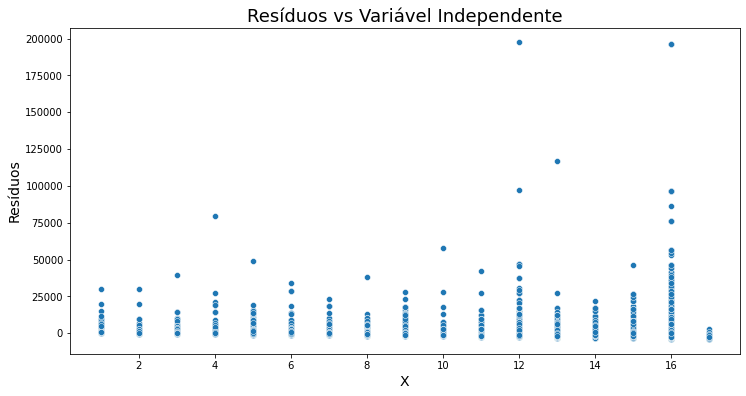

In [ ]:
ax = sns.scatterplot(x=dados['Anos de Estudo'], y=dados['Residuos'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos vs Variável Independente', fontsize=18)
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

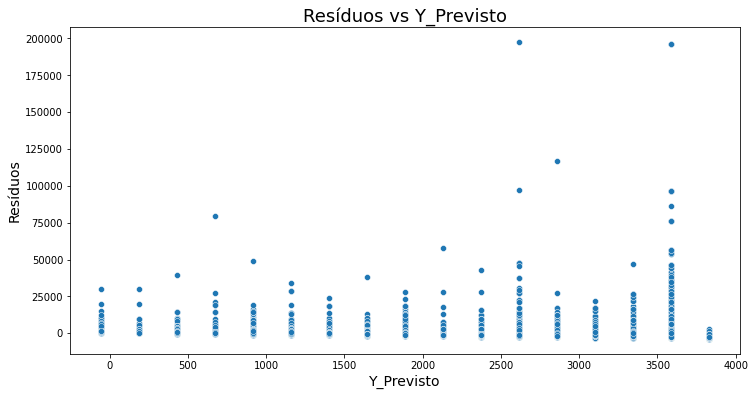

In [ ]:
ax = sns.scatterplot(x=dados.Renda_prevista, y=dados.Residuos)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos vs Y_Previsto', fontsize=18)
ax.set_xlabel('Y_Previsto', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

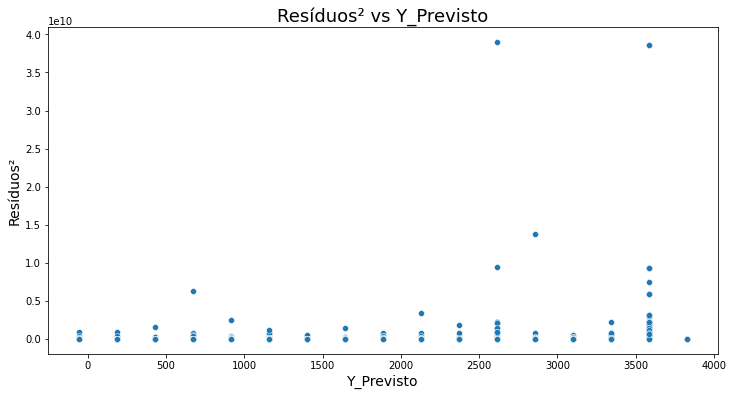

In [ ]:
ax = sns.scatterplot(x=dados.Renda_prevista, y=dados.Residuos**2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos² vs Y_Previsto', fontsize=18)
ax.set_xlabel('Y_Previsto', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax

# Coeficientes de Determinação

In [ ]:
sqe = resultado_regressao.ssr
sqe

755049245191.5847

In [ ]:
sqr = resultado_regressao.ess
sqr

93630287420.125

In [ ]:
sqt = sqe + sqr
sqt

848679532611.7097

In [ ]:
r2 = resultado_regressao.rsquared
r2

0.1103246677011156

# Testes aplicados ao modelo de regressão

# Regressão Linear Múltipla

In [ ]:
from sklearn.model_selection import train_test_split

y=dados['Renda']
x=dados[['Anos de Estudo','Sexo','Cor']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
modelo = LinearRegression()

In [ ]:
modelo.fit(x_train, y_train)

LinearRegression()

In [ ]:
modelo.score(x_train,y_train) #R²

0.13455064476992518

In [ ]:
y_previsto = modelo.predict(x_test)

In [ ]:
metrics.r2_score(y_test, y_previsto).round(2) #R²

0.14

In [ ]:
modelo.intercept_ # B1

531.7532444487306

In [ ]:
modelo.coef_ # B2 , B3 , B4

array([ 242.78843993, -907.47431666, -109.09822737])

## Analise gráficas das previsões do modelo

In [ ]:
y_previsto_train = modelo.predict(x_train)

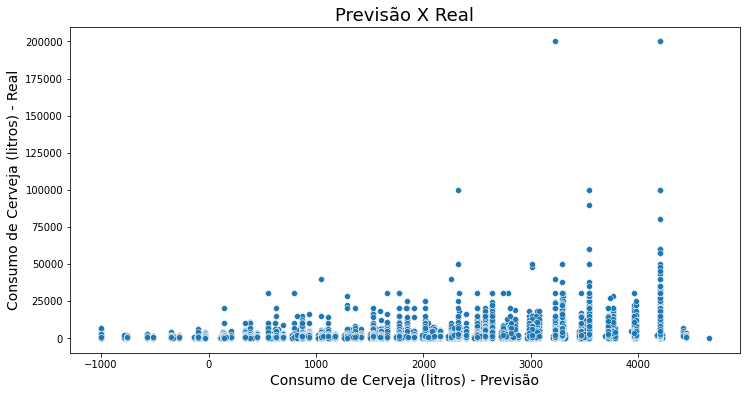

In [ ]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize=14)
ax

In [ ]:
residuo = y_train - y_previsto_train

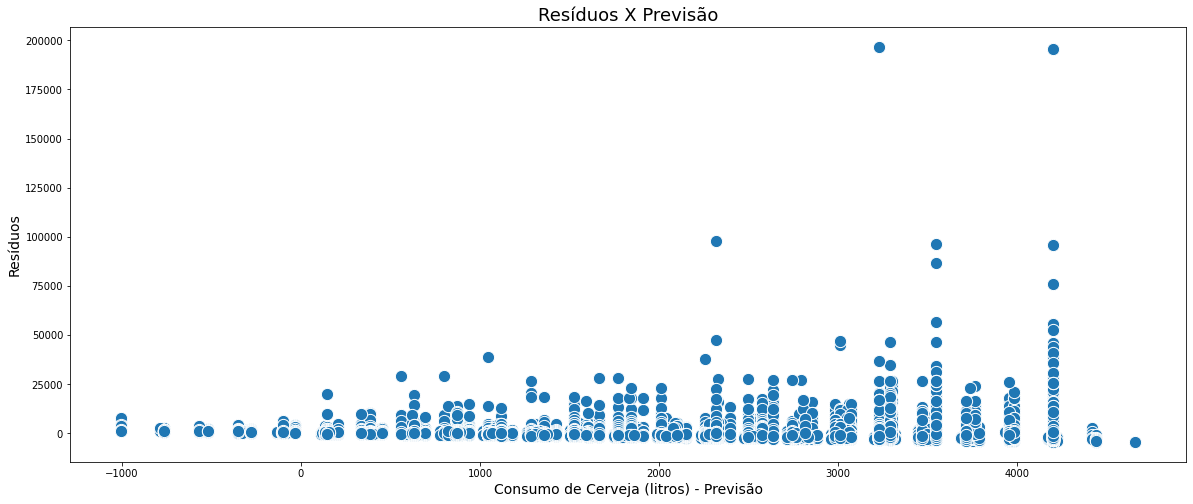

In [ ]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

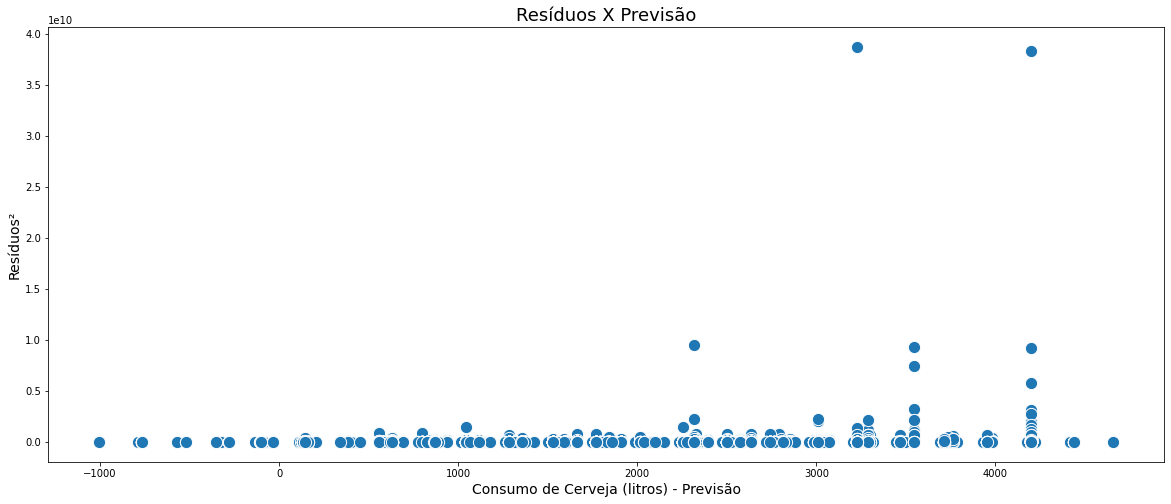

In [ ]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


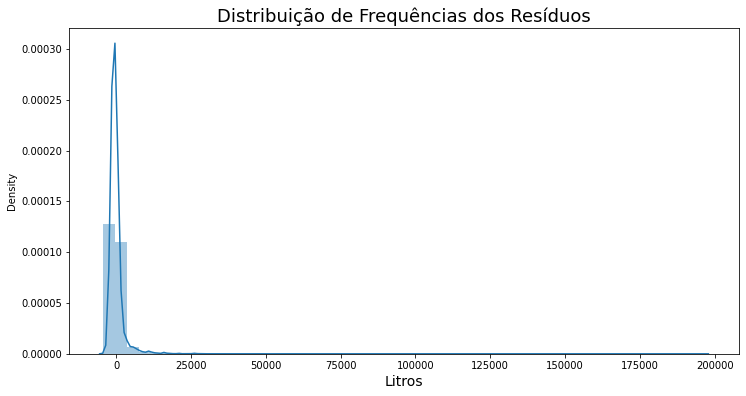

In [ ]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
ax

# Comparando Modelos

In [ ]:
x2 = dados[['Cor','UF']]

In [ ]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y, test_size=0.3, random_state=2811)

In [ ]:
modelo_2 = LinearRegression()

In [ ]:
modelo_2.fit(x2_train,y2_train)

LinearRegression()

Encontrando os R²

In [ ]:
modelo.score(x_train, y_train)

0.13455064476992518

In [ ]:
modelo_2.score(x2_train,y2_train)

0.031913489648245474

In [ ]:
y_previsto = modelo.predict(x_test)
y_previsto_2 = modelo_2.predict(x2_test)

In [ ]:
metrics.r2_score(y_test, y_previsto)

0.13599350597970727

In [ ]:
metrics.r2_score(y2_test, y_previsto_2)

0.030819044666753115

# brincadeirinha

In [ ]:
x=(1,2,3,4,1,2,3,4,5,1,2,3,4,5,6)
y=(11,12,13,14,11,12,13,14,15,11,12,13,14,15,16)

In [ ]:
dicionario = {'x':[1,2,3,4,1,2,3,4,5,1,2,3,4,5,6],
              'y':[2,4,6,8,2,4,6,8,10,2,4,6,8,10,12]}

In [ ]:
dados=pd.DataFrame(dicionario)

In [ ]:
dados

,x,y
0,1,2
1,2,4
2,3,6
3,4,8
4,1,2
5,2,4
6,3,6
7,4,8
8,5,10
9,1,2


In [ ]:
dados.cov()

,x,y
x,2.495238,4.990476
y,4.990476,9.980952


In [ ]:
dados.corr()

,x,y
x,1.0,1.0
y,1.0,1.0
